In [29]:
import numpy as np
import matplotlib.pyplot as plt
from time import time

# Exercise 1

#### 1. Create $A$ and $b$

In [2]:
n = 20
A = np.zeros((n, n))

# Assign for the first and last rows
A[0, 0] = 2
A[0, 1] = -1
A[-1, -1] = -1
A[-1, -2] = 2

# Assign for other rows
for i in range(1, n-1):
  A[i, i] = 2
  A[i, i-1] = -1
  A[i, i+1] = -1

b = np.ones((n, 1))

#### 2. Compute $f$ and $\nabla f$

In [3]:
def f(x):
    return np.average((A@x - b)**2)

def grad_f(x):
    return A.T@(A@x - b)/n

In [4]:
x0 = np.zeros((n,1))
f(x0)

np.float64(1.0)

#### 3. Solve using deterministic gradient descent
$$x_{k+1} = x_{k} - \alpha\nabla f(x_{k})$$
with stop criterion $f(x_{k}) < \epsilon.$ Try with different values of $\alpha$.

In [34]:
def gradient_descent(x0 = np.zeros((n,1)), alpha=0.1, epsilon = 0.1):
  iter = 0
  x_opt = x0
  history = [x0]

  while f(x_opt) >= epsilon:
    x_opt = x_opt - alpha*grad_f(x_opt)

    history.append(x_opt)
    iter += 1
  
  print(f"Terminated after {iter} iterations")
  print(f"Final error: {f(x_opt)}")
  return x_opt, history

In [ ]:
x_opt, history = gradient_descent(alpha=0.1, epsilon=0.1)

Terminated after 220146 iterations
Final error: 0.09999926514145405


In [ ]:
x_opt, history = gradient_descent(alpha=0.05, epsilon=0.1)

Terminated after 440291 iterations
Final error: 0.0999999413376448


In [ ]:
x_opt, history = gradient_descent(alpha=0.5, epsilon=0.1)

Terminated after 44029 iterations
Final error: 0.09999837211083816


In [ ]:
x_opt, history = gradient_descent(alpha=1, epsilon=0.1)

Terminated after 22015 iterations
Final error: 0.09999161028281879


In [ ]:
x_opt, history = gradient_descent(alpha=1.2, epsilon=0.1)

Terminated after 18345 iterations
Final error: 0.09999974505451217


In [ ]:
x_opt, history = gradient_descent(alpha=1.5, epsilon=0.1)

Terminated after 14676 iterations
Final error: 0.0999983977460424


In [ ]:
x_opt, history = gradient_descent(alpha=2, epsilon=0.1)

Terminated after 11007 iterations
Final error: 0.09999615221817111


In [ ]:
x_opt, history = gradient_descent(alpha=5, epsilon=0.1)

Terminated after 656 iterations
Final error: nan


c:\Users\DELL\anaconda3\envs\general\Lib\site-packages\numpy\_core\_methods.py:136: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims, where=where)
C:\Users\DELL\AppData\Local\Temp\ipykernel_7156\1799147344.py:2: RuntimeWarning: overflow encountered in square
  return np.average((A@x - b)**2)
C:\Users\DELL\AppData\Local\Temp\ipykernel_7156\1799147344.py:5: RuntimeWarning: overflow encountered in matmul
  return A.T@(A@x - b)/n
C:\Users\DELL\AppData\Local\Temp\ipykernel_7156\1799147344.py:2: RuntimeWarning: invalid value encountered in matmul
  return np.average((A@x - b)**2)


Conclusion: We can let $\alpha$ up to 2 to reach faster convergence without losing precision. Below are the plots when $\alpha=2$.

#### 4. Plot the progress

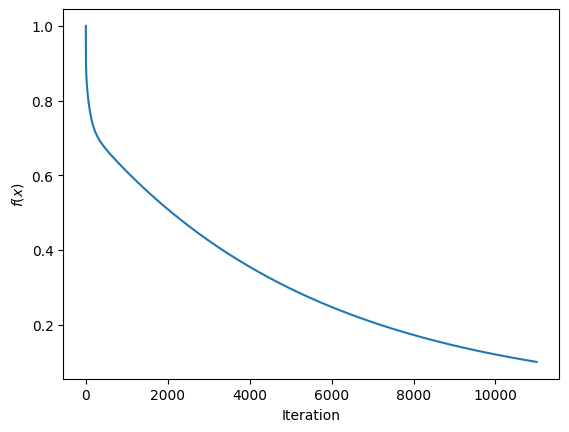

In [26]:
# Plot in the case 

plt.plot([f(x) for x in history])
plt.xlabel('Iteration')
plt.ylabel('$f(x)$')

plt.show()

In [27]:
def norm(vec):
  return np.sqrt(np.sum(vec**2))

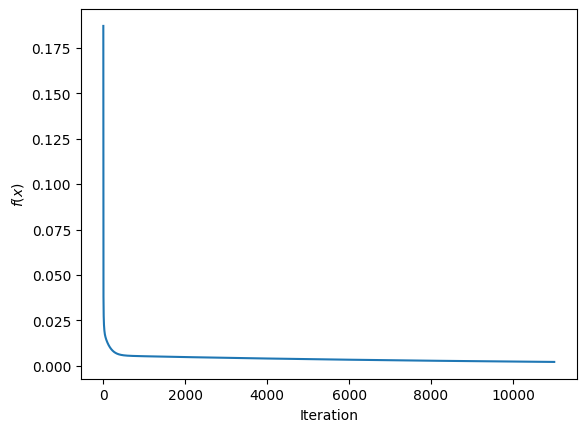

In [28]:
plt.plot([norm(grad_f(x)) for x in history])
plt.xlabel('Iteration')
plt.ylabel('$f(x)$')

plt.show()

#### 5. Measure time with $\epsilon = 0.5$

In [35]:
start = time()
gradient_descent(alpha=2, epsilon=0.5)
end = time()
print(f"Execution time: {end-start}s" )

Terminated after 2099 iterations
Final error: 0.49997158385208557
Execution time: 0.0398402214050293s


# Exercise 2

#### 1. Solve using SDG. Try different values of $\alpha$.

In [39]:
def sgd(x0 = np.zeros((n,1)), alpha=0.01, epsilon = 0.1):

  iter = 0
  x_opt = x0
  history = [x0]

  while f(x_opt) >= epsilon:
    k = np.random.choice(range(0, n))
    g_k = ((A[k]@x_opt - b[k])[0] * A[k]).reshape(n, 1)

    x_opt = x_opt - alpha*g_k

    history.append(x_opt)
    iter += 1
  
  print(f"Terminated after {iter} iterations")
  print(f"Final error: {f(x_opt)}")
  return x_opt, history

In [40]:
x_opt, history = sgd(alpha=0.01, epsilon=0.1)

Terminated after 2205326 iterations
Final error: 0.09992809974255468


In [41]:
x_opt, history = sgd(alpha=0.1, epsilon=0.1)

Terminated after 224781 iterations
Final error: 0.09978686789561522


In [45]:
x_opt, history = sgd(alpha=0.2, epsilon=0.1)

Terminated after 131230 iterations
Final error: 0.0992612184584219


In [44]:
x_opt, history = sgd(alpha=0.5, epsilon=0.1)

Terminated after 8421 iterations
Final error: nan


c:\Users\DELL\anaconda3\envs\general\Lib\site-packages\numpy\_core\_methods.py:136: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims, where=where)
C:\Users\DELL\AppData\Local\Temp\ipykernel_7156\1799147344.py:2: RuntimeWarning: overflow encountered in square
  return np.average((A@x - b)**2)
C:\Users\DELL\AppData\Local\Temp\ipykernel_7156\1594260407.py:9: RuntimeWarning: overflow encountered in multiply
  g_k = ((A[k]@x_opt - b[k])[0] * A[k]).reshape(n, 1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_7156\1799147344.py:2: RuntimeWarning: invalid value encountered in matmul
  return np.average((A@x - b)**2)


Conclusion: We can let $\alpha$ up to 0.2 to reach faster convergence while maintaining precision. Below is the plot in the case $\alpha=0.2$.

#### 2. Draw a plot an compare with GD

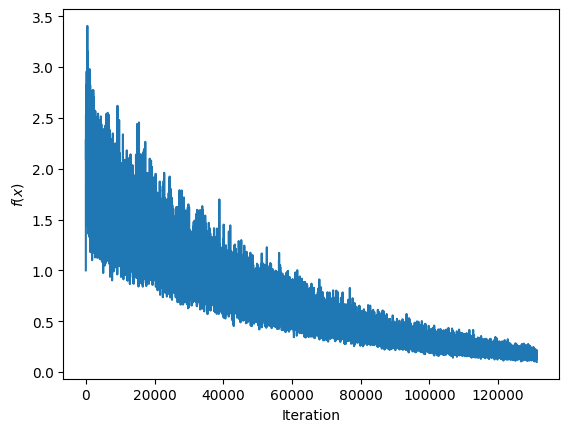

In [46]:
plt.plot([f(x) for x in history])
plt.xlabel('Iteration')
plt.ylabel('$f(x)$')

plt.show()

Now we draw a plot for the case $\alpha=0.2$ in Gradient descent to compare.

In [47]:
x_opt, history = gradient_descent(alpha=0.2, epsilon=0.1)

Terminated after 110073 iterations
Final error: 0.09999881605898168


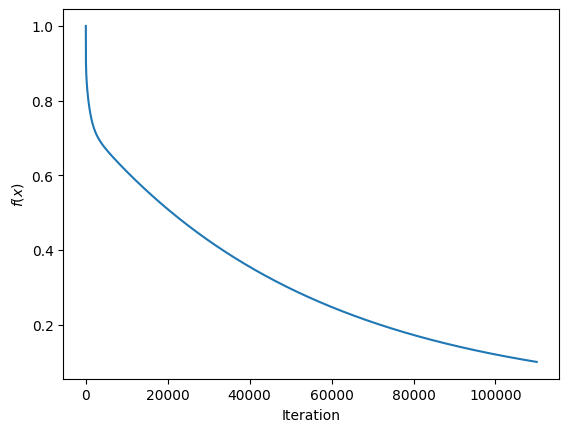

In [48]:
plt.plot([f(x) for x in history])
plt.xlabel('Iteration')
plt.ylabel('$f(x)$')

plt.show()

Conclusion: SGD does not take much more iterations than GD to converge. The progress of SGD seems to fluctuate more than that of GD.

#### 3. Measure time in the case $\epsilon=0.5$ and compare with GD.

In [49]:
start = time()
sgd(alpha=0.2, epsilon=0.5)
end = time()
print(f"Execution time: {end-start}s")

Terminated after 43132 iterations
Final error: 0.4925709174134811
Execution time: 0.7750828266143799s


In [50]:
start = time()
gradient_descent(alpha=0.2, epsilon=0.5)
end = time()
print(f"Execution time: {end-start}s")

Terminated after 20988 iterations
Final error: 0.49999736946450957
Execution time: 0.25516533851623535s


Conclusion: SGD takes 3 times more time to converge comparing to GD.